## Hard Margin vs Soft Margin in SVM

### Hard Margin SVM

- Used when **data is perfectly linearly separable**.

- The SVM tries to find a **hyperplane** that **separates all data points** without any misclassification.

- **No point is allowed inside the margin or on the wrong side** of the hyperplane.

- It ensures **zero classification error**, but:

    - Not robust to **noise** or **outliers**.

    - Works only for **clean, linearly separable data**.

### Key idea:

- No misclassification → margin must be completely clear.

### Condition:

For all data points ( 𝑥𝑖 , 𝑦𝑖 ) :

   **yi ​( w ⋅ xi ​+ b ) ≥ 1**

### Soft Margin SVM

- Used when data cannot be perfectly separated.

- Allows some misclassification or overlap (controlled by slack variables 𝜉𝑖 ).

- The goal is to balance:

    - Maximizing the margin

    - Minimizing the classification error

- Controlled by the C parameter (regularization):

    - Large C → less tolerance for error (behaves like hard margin)

    - Small C → more tolerance for error, larger margin

### Key idea:

- Allows a few points to be inside or even on the wrong side of the margin → better generalization.

### Condition:

 **yi ​( w ⋅ xi​ + b ) ≥ 1 − ξi** ​, `where ξi ​≥ 0`


| Concept               | Hard Margin              | Soft Margin                      |
| --------------------- | ------------------------ | -------------------------------- |
| **Use Case**          | Perfectly separable data | Non-separable / noisy data       |
| **Misclassification** | Not allowed              | Allowed (controlled by C)        |
| **Flexibility**       | Rigid                    | Flexible                         |
| **Outliers**          | Sensitive                | More robust                      |
| **Goal**              | Maximize margin          | Maximize margin + minimize error |


### In simple terms:

- Hard Margin → No mistakes allowed.

- Soft Margin → A few mistakes allowed to make the model more general and robust.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14752\3659282508.py:52: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14752\3659282508.py:52: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
f:\clg\Data Science\1-Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
f:\clg\Data Science\1-Python\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


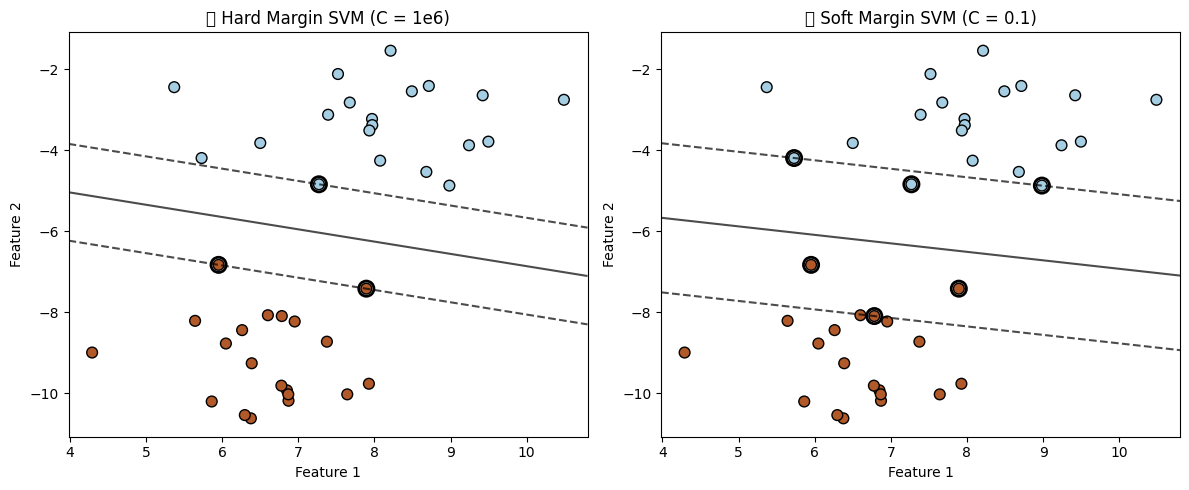

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Generate synthetic dataset
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=6)

# Hard Margin SVM (C = very large)
clf_hard = svm.SVC(kernel='linear', C=1e6)
clf_hard.fit(X, y)

# Soft Margin SVM (C = small)
clf_soft = svm.SVC(kernel='linear', C=0.1)
clf_soft.fit(X, y)

# Function to plot decision boundaries
def plot_svm(clf, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, cmap=plt.cm.Paired, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.7, linestyles=['--', '-', '--'])

    # Plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=120, linewidth=2, facecolors='none', edgecolors='k')

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Plot side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_svm(clf_hard, X, y, "🔵 Hard Margin SVM (C = 1e6)")

plt.subplot(1, 2, 2)
plot_svm(clf_soft, X, y, "🟢 Soft Margin SVM (C = 0.1)")

plt.tight_layout()
plt.show()

## Cost Function of Support Vector Machine (SVM)

The main goal of SVM is to:

✅ Maximize the margin between classes
❌ Minimize misclassification errors

So, the cost function combines both goals.

### For Hard Margin

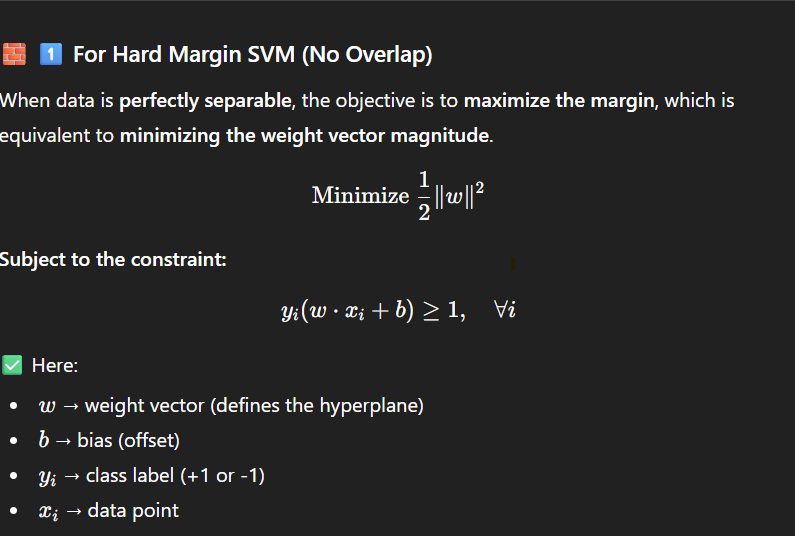

### For Soft Margin

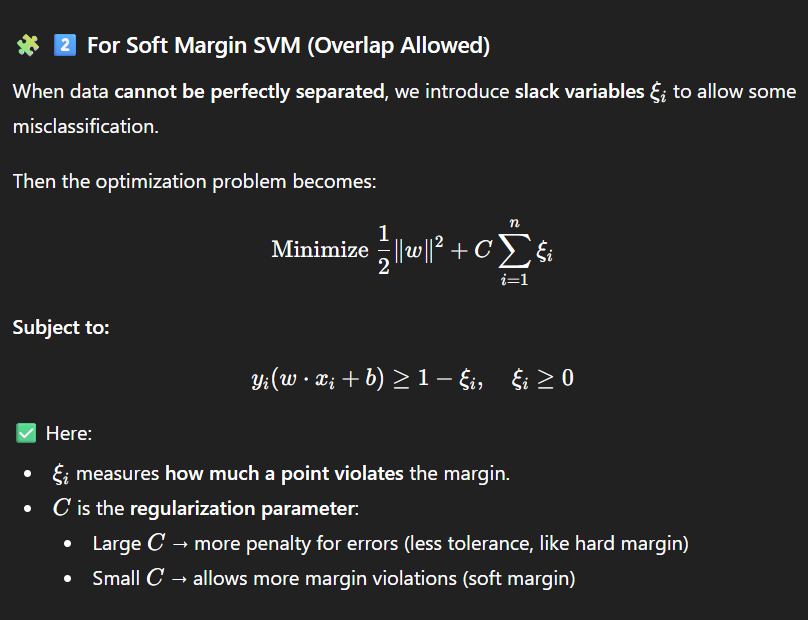